In [1]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
from qiskit_aer.primitives import Sampler

In [7]:
input_table = np.array([[False, False], [False, True], [True, False], [True, True]])
input_table.astype(int)

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [31]:
results = {}
for input_bits in input_table:
    print(input_bits)
    qreg = qiskit.QuantumRegister(3, name="qreg")
    creg = qiskit.ClassicalRegister(1, name="creg")
    qc = qiskit.QuantumCircuit(qreg, creg)

    # Prepare circuit
    if input_bits[0]: 
        qc.x(qreg[0])
    if input_bits[1]:
        qc.x(qreg[1])

    qc.x(qreg[0])
    qc.cx(qreg[1], qreg[2])
    qc.cx(qreg[0], qreg[2])
    qc.measure(qreg[2], creg)
    qc.draw("mpl")

    result = Sampler().run([qc], shots=5000).result()
    results["".join(input_bits.astype(int).astype(str))] = result

[False False]
[False  True]
[ True False]
[ True  True]


In [32]:
results

{'00': SamplerResult(quasi_dists=[{1: 1.0}], metadata=[{'shots': 5000, 'simulator_metadata': {'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1, 2], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 3, 'num_clbits': 1, 'time_taken': 0.0106395, 'sample_measure_time': 0.0022018, 'input_qubit_map': [[0, 0], [1, 1], [2, 2]], 'max_memory_mb': 14182, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 16, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}}]),
 '01': SamplerResult(quasi_dists=[{0: 1.0}], metadata=[{'shots': 5000, 'simulator_metadata': {'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1, 2], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 3, 'num_clbits': 1, 'time_taken': 0.0128246, 'sample_measure_time': 0.0038941, 'input_qubit_map': [[0, 0], [1, 1], [2, 2]], 'ma

In [14]:
results["11"].quasi_dists[0]

{1: 1.0}

<BarContainer object of 1 artists>

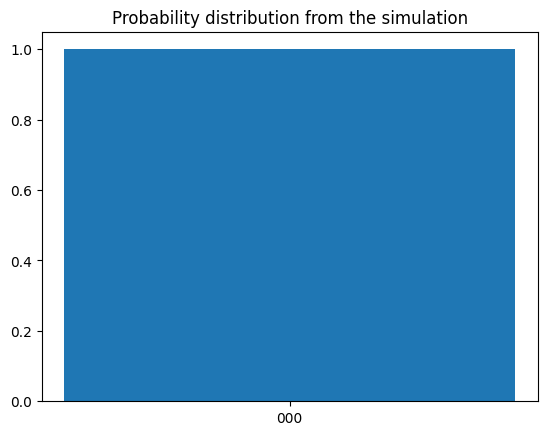

In [4]:
plot_labels = [bin(label)[2:].zfill(3) for label in result.quasi_dists[0]]
plt.title("Probability distribution from the simulation")
plt.bar(plot_labels, result.quasi_dists[0].values())